In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install backtesting ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173916 sha256=3cbe4fe8661b24e4e64692a68dea80c3f0c7d11add7b9902565f3b5c1b917362
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29089 sha256=0b225a54ab92e2bc1691ca164141e354d627e81cf5e97ccc53ce0c5c7a0a3be1
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built backtesting ta


In [3]:
!pip install vnstock

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from vnstock import *
from backtesting import Backtest, Strategy
from ta.trend import sma_indicator

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


In [5]:
listing_companies()

,ticker,comGroupCode,organName,organShortName,organTypeCode,comTypeCode,icbName,icbNamePath,sector,industry,...,VNCOND,VNCONS,VNENE,VNFIN,VNHEAL,VNIND,VNIT,VNMAT,VNREAL,VNUTI
0,SSI,HOSE,Công ty Cổ phần Chứng khoán SSI,Chứng khoán SSI,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,...,False,False,False,True,False,False,False,False,False,False
1,BCM,HOSE,Tổng Công ty Đầu tư và Phát triển Công nghiệp ...,Becamex IDC,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,...,False,False,False,False,False,False,False,False,True,False
2,VHM,HOSE,Công ty Cổ phần Vinhomes,Vinhomes,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,...,False,False,False,False,False,False,False,False,True,False
3,VIC,HOSE,Tập đoàn Vingroup - Công ty CP,VinGroup,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,...,False,False,False,False,False,False,False,False,True,False
4,VRE,HOSE,Công ty Cổ phần Vincom Retail,Vincom Retail,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,SDK,UPCOM,Công ty Cổ phần Cơ khí Luyện Kim,Cơ khí Luyện Kim,DN,CT,Máy công nghiệp,Công nghiệp/Hàng & Dịch vụ Công nghiệp/Công ng...,Công nghiệp,Hàng & Dịch vụ Công nghiệp,...,False,False,False,False,False,False,False,False,False,False
1603,SRF,HOSE,Công ty Cổ phần Searefico,SEAREFICO,DN,CT,Máy công nghiệp,Công nghiệp/Hàng & Dịch vụ Công nghiệp/Công ng...,Công nghiệp,Hàng & Dịch vụ Công nghiệp,...,False,False,False,False,False,False,False,False,False,False
1604,UEM,UPCOM,Công ty Cổ phần Cơ điện Uông Bí - Vinacomin,Cơ điện Uông Bí - Vinacomin,DN,CT,Máy công nghiệp,Công nghiệp/Hàng & Dịch vụ Công nghiệp/Công ng...,Công nghiệp,Hàng & Dịch vụ Công nghiệp,...,False,False,False,False,False,False,False,False,False,False
1605,VEA,UPCOM,Tổng Công ty Máy động lực và Máy nông nghiệp V...,Máy động lực và Máy NN,DN,CT,Máy công nghiệp,Công nghiệp/Hàng & Dịch vụ Công nghiệp/Công ng...,Công nghiệp,Hàng & Dịch vụ Công nghiệp,...,False,False,False,False,False,False,False,False,False,False


In [6]:
company_overview('VCB')

,ticker,exchange,industry,companyType,noShareholders,foreignPercent,outstandingShare,issueShare,establishedYear,noEmployees,stockRating,deltaInWeek,deltaInMonth,deltaInYear,shortName,industryEn,industryID,industryIDv2,website
0,VCB,HOSE,Ngân hàng,NH,25183,0.235,5589.1,5589.1,2008,17215,3.9,0.023,0.03,0.395,Vietcombank,Banks,289,8355,http://www.vietcombank.com.vn


In [16]:
df = stock_historical_data("VCB", "2013-01-03", "2023-01-03")

In [17]:
df

,time,open,high,low,close,volume,ticker
0,2013-01-04,9960,10490,9890,10380,501540,VCB
1,2013-01-07,9960,10670,9960,10670,1312740,VCB
2,2013-01-08,10880,11200,10700,11200,1035220,VCB
3,2013-01-09,10700,11270,10670,11270,1583320,VCB
4,2013-01-10,11310,11560,10920,11560,645400,VCB
...,...,...,...,...,...,...,...
2490,2022-12-27,67650,68160,66810,66980,1058000,VCB
2491,2022-12-28,68080,69430,67320,67740,1173500,VCB
2492,2022-12-29,69690,69860,68160,68330,1237400,VCB
2493,2022-12-30,70190,70360,67740,67740,1510900,VCB


#Câu1:

In [24]:
df.columns = ['Time','Open','High','Low','Close','Volume','Ticker']

In [25]:
df['Time'] = pd.to_datetime(df['Time'])

In [26]:
df = df.set_index('Time')

In [27]:
df

,Open,High,Low,Close,Volume,Ticker
Time,,,,,,
2013-01-04,9960,10490,9890,10380,501540,VCB
2013-01-07,9960,10670,9960,10670,1312740,VCB
2013-01-08,10880,11200,10700,11200,1035220,VCB
2013-01-09,10700,11270,10670,11270,1583320,VCB
2013-01-10,11310,11560,10920,11560,645400,VCB
...,...,...,...,...,...,...
2022-12-27,67650,68160,66810,66980,1058000,VCB
2022-12-28,68080,69430,67320,67740,1173500,VCB
2022-12-29,69690,69860,68160,68330,1237400,VCB


In [28]:
df['SMA 20'] = sma_indicator(close=df['Close'], window=20) #Đường SMA (20)
df['SMA 50'] = sma_indicator(close=df['Close'], window=50) #Đường SMA (50)

In [29]:
df.head(200)

,Open,High,Low,Close,Volume,Ticker,SMA 20,SMA 50
Time,,,,,,,,
2013-01-04,9960,10490,9890,10380,501540,VCB,NaN,NaN
2013-01-07,9960,10670,9960,10670,1312740,VCB,NaN,NaN
2013-01-08,10880,11200,10700,11200,1035220,VCB,NaN,NaN
2013-01-09,10700,11270,10670,11270,1583320,VCB,NaN,NaN
2013-01-10,11310,11560,10920,11560,645400,VCB,NaN,NaN
...,...,...,...,...,...,...,...,...
2013-10-18,10880,10950,10810,10950,183840,VCB,10251.5,9699.2
2013-10-21,10990,10990,10880,10920,149520,VCB,10331.0,9719.2
2013-10-22,10920,10950,10810,10840,237630,VCB,10403.0,9738.4


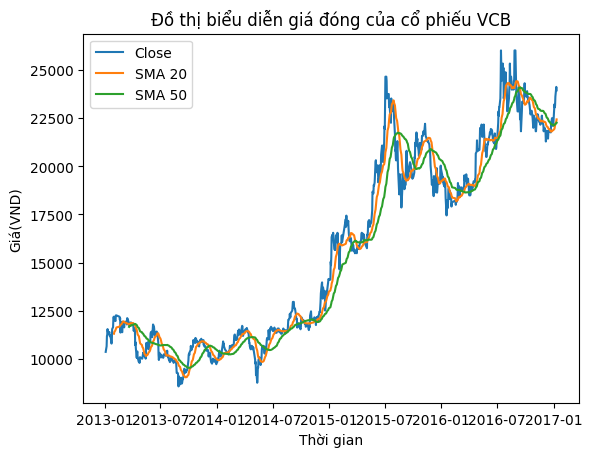

In [30]:
plt.plot(df['Close'].head(1000), label = 'Close')
plt.plot(df['SMA 20'].head(1000), label = 'SMA 20')
plt.plot(df['SMA 50'].head(1000), label = 'SMA 50')
plt.title('Đồ thị biểu diễn giá đóng của cổ phiếu VCB')
plt.xlabel('Thời gian')
plt.ylabel('Giá(VND)')
plt.legend()

#Câu 2:   

In [31]:
df.loc[
    (df['SMA 20'] > df['SMA 50'])
    & (df['SMA 20'].shift(1) <= df['SMA 50']. shift(1)), 'position'] = 1
df.loc[
    (df['SMA 20'] < df['SMA 50'])
    & (df['SMA 20'].shift(1) >= df['SMA 50']. shift(1)), 'position'] = -1

In [32]:
df[df['position'].notnull()]

,Open,High,Low,Close,Volume,Ticker,SMA 20,SMA 50,position
Time,,,,,,,,,
2013-04-09,11510,11620,11470,11510,120270,VCB,11804.50,11827.40,-1.0
2013-06-07,11650,11840,11650,11800,594630,VCB,10914.00,10831.80,1.0
2013-07-09,10140,10220,10100,10180,105910,VCB,10672.50,10729.80,-1.0
2013-10-08,10470,10690,10400,10690,790490,VCB,9651.50,9578.80,1.0
2013-12-06,10250,10330,10220,10290,88990,VCB,10647.00,10691.80,-1.0
2014-01-27,10660,10660,10510,10510,743890,VCB,10323.50,10284.40,1.0
2014-04-28,10510,10690,10470,10510,843660,VCB,11103.00,11141.60,-1.0
2014-06-16,11030,11030,10880,11030,692070,VCB,10501.50,10499.60,1.0
2014-10-10,12080,12080,11950,11950,242990,VCB,11914.00,11946.80,-1.0


#Câu 3:

In [33]:
df.head()

,Open,High,Low,Close,Volume,Ticker,SMA 20,SMA 50,position
Time,,,,,,,,,
2013-01-04,9960,10490,9890,10380,501540,VCB,NaN,NaN,NaN
2013-01-07,9960,10670,9960,10670,1312740,VCB,NaN,NaN,NaN
2013-01-08,10880,11200,10700,11200,1035220,VCB,NaN,NaN,NaN
2013-01-09,10700,11270,10670,11270,1583320,VCB,NaN,NaN,NaN
2013-01-10,11310,11560,10920,11560,645400,VCB,NaN,NaN,NaN


In [34]:
class GeneralStrategy(Strategy):
    def init(self):
        pass
    def next(self):
        if self.data.position == 1:
            self.buy(size=100) #mỗi lần thực hiện giao dịch sẽ mua 100 cổ phiếu/giao dịch
        elif self.data.position == -1:
           self.sell(size=100)

In [35]:
bt = Backtest(
    df,
    GeneralStrategy,
    cash=100000000, #Số tiền đầu tư là 100.000.000 đồng
    commission=0, #Phí giao dịch là 0%
    trade_on_close=True,
    exclusive_orders=True)
stats = bt.run()

In [36]:
class SMAStrategy(Strategy):
    def init(self):
        self.short_window = self.data.Short_Window
        self.long_window = self.data.Long_Window
        self.sma_short = sma_indicator(close=self.data.Close, window=self.short_window)
        self.sma_long = sma_indicator(close=self.data.Close, window=self.long_window)

    def next(self):
        if  self.sma_short > self.sma_long and self.sma_short.shift(1) <= self.sma_long.shift(1):
            self.buy(size=100)

        elif self.sma_short < self.sma_long and self.sma_short.shift(1) >= self.sma_long.shift(1):
             self.sell(size=100)


In [37]:
best_strategy = None
best_profit = 0

In [38]:
for short_window in range(10, 21):
    for long_window in range(30, 51):
        strategy_df = df.copy()
        strategy_df['Short_Window'] = short_window
        strategy_df['Long_Window'] = long_window

        if stats['Equity Final [$]'] - 100000000 > best_profit:
            best_profit = stats['Equity Final [$]'] - 100000000
            best_strategy = (short_window, long_window)

short_window, long_window = best_strategy
df['SMA ' + str(short_window)] = sma_indicator(close=df['Close'], window=short_window)
df['SMA ' + str(long_window)] = sma_indicator(close=df['Close'], window=long_window)

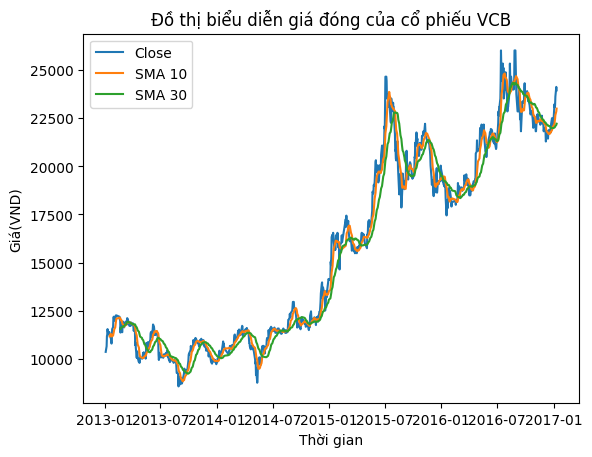

Cặp đường SMA(ngắn hạn) và đường SMA(dài hạn) để nhà đầu tư có thể kiếm được số tiền nhiều nhất sau khi thực hiện chiến thuật giao dịch dựa trên đường SMA là SMA(10, 30) với lợi nhuận là : 1,772,800 VND


In [39]:
plt.plot(df['Close'].head(1000), label='Close')
plt.plot(df['SMA ' + str(short_window)].head(1000), label='SMA ' + str(short_window))
plt.plot(df['SMA ' + str(long_window)].head(1000), label='SMA ' + str(long_window))
plt.title('Đồ thị biểu diễn giá đóng của cổ phiếu VCB')
plt.xlabel('Thời gian')
plt.ylabel('Giá(VND)')
plt.legend()
plt.show()

print("Cặp đường SMA(ngắn hạn) và đường SMA(dài hạn) để nhà đầu tư có thể kiếm được số tiền nhiều nhất sau khi thực hiện chiến thuật giao dịch dựa trên đường SMA là SMA({}, {}) với lợi nhuận là : {:,} VND".format(short_window, long_window, int(best_profit)))

#Câu 4:

In [83]:
Banks = ['CTG', 'STB', 'HDB', 'EIB', 'BID', 'VPB', 'ACB', 'TCB', 'MBB', 'VIB', 'SHB', 'VCB', 'LPB', 'TPB'] #Thêm vào rổ các cổ phiếu ngành ngân hàng
start_date = '2013-01-03'
end_date = '2023-01-03'
results = {}

In [115]:
df1 = pd.DataFrame()

In [118]:
for bank in Banks:
  df1= pd.concat([df1,stock_historical_data(bank, start_date=start_date, end_date=end_date)])

In [119]:
df1['ticker'].unique()

array(['EIB', 'CTG', 'STB', 'HDB', 'BID', 'VPB', 'ACB', 'TCB', 'MBB',
       'VIB', 'SHB', 'VCB', 'LPB', 'TPB'], dtype=object)

In [120]:
df1.columns = ['Time','Open','High','Low','Close','Volume','Ticker']
df1['Time'] = pd.to_datetime(df1['Time'])
df1 = df1.set_index('Time')

In [121]:
# Vì yêu cầu sử dụng chiến thuật giao dịch theo các đường SMA đã xác định ở câu 3 để lựa chọn cổ phiếu nên em sẽ sử dụng SMA(10) và SMA(30)
df1['SMA 10'] = sma_indicator(close=df1['Close'],window=10)
df1['SMA 30'] = sma_indicator(close=df1['Close'],window=30)
df1.loc[
  (df1['SMA 10'] > df1['SMA 30'])
  &(df1['SMA 10'].shift(1)<=df1['SMA 30'].shift(1)),'Position']=1
df1.loc[
  (df1['SMA 30'] < df1['SMA 30'])
  &(df1['SMA 10'].shift(1)>=df1['SMA 30'].shift(1)),'Position']=-1

In [122]:
class GeneralStrategy(Strategy):
        def init(self):
            pass
        def next(self):
            if self.data.position == 1:
                self.buy(size=100) #mỗi lần thực hiện giao dịch sẽ mua 100 cổ phiếu/giao dịch
            elif self.data.position == -1:
                self.sell(size=100)


In [124]:
symbols = []
best_stock = []
best_profit = []

In [125]:
for symbol in Banks:
  if df1[df1['Ticker'] == symbol].empty:
    continue
  bt1 = Backtest(df1[df1['Ticker'] == symbol],
                 GeneralStrategy,
                 cash=100000000, #Số tiền đầu tư là 100.000.000 đồng
                 commission=0, #Phí giao dịch là 0%
                 trade_on_close=True,
                 exclusive_orders=True)
  stats = bt.run()

  symbols.append(symbol)
  results[symbol] = stats.get('Return [%]')
  best_stock.append(max(results, key=results.get))
  best_profit.append(results[best_stock[-1]])



<ipython-input-125-deef8d1b3d67>:4: UserWarning: Data index is not sorted in ascending order. Sorting.
  bt1 = Backtest(df1[df1['Ticker'] == symbol],


In [129]:
results = pd.DataFrame(
    {
        'symbol': symbols,
        'best_stock': best_stock,
        'best_profit': best_profit
    }
)

results

,symbol,best_stock,best_profit
0,CTG,CTG,1.7728
1,STB,CTG,1.7728
2,HDB,CTG,1.7728
3,EIB,CTG,1.7728
4,BID,CTG,1.7728
5,VPB,CTG,1.7728
6,ACB,CTG,1.7728
7,TCB,CTG,1.7728
8,MBB,CTG,1.7728
9,VIB,CTG,1.7728


In [ ]:
print("Cổ phiếu có tỷ suất sinh lợi cao nhất trong rổ các cổ phiếu ngành ngân hàng là:", best_stock)
print("Tỷ suất sinh lợi là:", best_profit)